# Лабораторная работа
## Выполнил: Сергеев Александр, 18 МАГ ИАД
### Датасет: https://archive.ics.uci.edu/ml/datasets/seismic-bumps
#### Задача классификации состоит в предсказании повышенной сейсмической активности, способной вызвать внезапное обрушение в шахте. Таким образом, существует 2 класса - опасный (на следующий день произошло обрушение) и неопасный (обрушение не произошло).
#### Набор данных не имеет пропущенных значений.
#### Информация об атрибутах:
1. seismic: результат оценки сейсмической опасности сдвига в шахте, полученный сейсмическим методом (a - отсутствие опасности, b - низкая опасность, c - высокая опасность, d - состояние опасности);
2. seismoacoustic: результат оценки сейсмической опасности сдвига в шахте, полученный сейсмоакустическим методом;
3. shift: информация о типе рабочего дня (W - добыча угля, N - подготовка);
4. genergy: сейсмическая энергия, зарегистрированная в предыдущий рабочий день самым активным геофоном (GMax);
5. gpuls: количество импульсов, записанных в предыдущий рабочий день GMax`ом;
6. gdenergy: отклонение энергии, записанное в предыдущий рабочий день GMax`ом от средней энергии
полученной за 8 предыдущих дней;
7. gdpuls: отклонение количества импульсов, зарегистрированных  в предыдущий рабочий день GMax`ом от среднего числа
импульсов, полученного за 8 предыдущих дней;
8. ghazard: результат оценки сейсмической опасности сдвига в шахте, полученной сейсмоакустическим методом GMax`ом;
9. nbumps: количество сейсмических ударов, зарегистрированных в предыдущий рабочий день;
10. nbumps2: количество сейсмических ударов (в диапазоне энергий [10 ^ 2,10 ^ 3)), зарегистрированных в предыдущий рабочий день;
11. nbumps3: количество сейсмических ударов (в диапазоне энергий [10 ^ 3,10 ^ 4)), зарегистрированных в предыдущий рабочий день;
12. nbumps4: количество сейсмических ударов (в диапазоне энергий [10 ^ 4,10 ^ 5)), зарегистрированных в предыдущий рабочий день;
13. nbumps5: количество сейсмических ударов (в диапазоне энергий [10 ^ 5,10 ^ 6)), зарегистрированных в предыдущий рабочий день;
14. nbumps6: количество сейсмических ударов (в диапазоне энергий [10 ^ 6,10 ^ 7)), зарегистрированных в предыдущий рабочий день;
15. nbumps7: количество сейсмических ударов (в диапазоне энергий [10 ^ 7,10 ^ 8)), зарегистрированных в предыдущий рабочий день;
16. nbumps8,9: количество сейсмических ударов (в диапазоне энергий [10 ^ 8,10 ^ 10)), зарегистрированных в предыдущий рабочий день;
17. energy: полная энергия сейсмических ударов, зарегистрированная в предыдущий рабочий день;
18. maxenergy: максимальная энергия сейсмических ударов, зарегистрированная в предыдущий рабочий день;
19. calss: атрибут принятия решения - «1» означает, что сейсмический удар высокой энергии произошел в следующий рабочий день
(«опасное состояние»), «0» означает, что в следующий рабочий день сейсмических волн с высокой энергией не произошло
(«неопасное состояние»).

# Лабораторная работа №1

#### Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Читаем датасет из локального файла с помощью функции pandas read_csv:

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00266/seismic-bumps.arff'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv('datasets/seismic-bumps.csv', engine = 'python')

#### Узнаем тип данных и выводим первые (функция head) и последние (функция tail) 5 записей

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.tail()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


#### Узнаем размерность и названия колонок

In [6]:
print(data.shape)
print(data.columns)

(2584, 19)
Index(['%seismic', 'seismoacoustic', 'shift', 'genergy', 'gplus', 'gdenergy',
       'gdpuls', 'hazard', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5',
       'bumps6', 'bumps7', 'bumps8', 'energy', 'maxenergy', 'class'],
      dtype='object')


#### Узнаем количество записей и выведем значения атрибута shift

In [7]:
data.index

RangeIndex(start=0, stop=2584, step=1)

In [8]:
data['shift']

0       N
1       N
2       N
3       N
4       N
5       W
6       W
7       N
8       N
9       W
10      N
11      N
12      W
13      N
14      N
15      W
16      N
17      N
18      N
19      N
20      N
21      N
22      N
23      N
24      W
25      N
26      N
27      W
28      N
29      W
       ..
2554    W
2555    W
2556    W
2557    W
2558    N
2559    N
2560    N
2561    N
2562    N
2563    W
2564    W
2565    W
2566    W
2567    W
2568    W
2569    W
2570    W
2571    W
2572    W
2573    W
2574    W
2575    W
2576    W
2577    W
2578    W
2579    W
2580    W
2581    W
2582    W
2583    W
Name: shift, Length: 2584, dtype: object

In [9]:
data['shift'][3]

'N'

#### Узнаем типы различных атрибутов различными способами и выводим первые 5 значений с помощью head

In [10]:
data['bumps'].dtype.name

'int64'

In [11]:
type(data['shift'][3])

str

In [12]:
data[['shift', 'genergy']].head()

,shift,genergy
0,N,15180
1,N,14720
2,N,8050
3,N,28820
4,N,12640


#### Выводим описательную статистику по атрибутам (по-умолчанию только по числовым)

In [13]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


#### Строим диаграмму рассеяния и выводим матрицу корреляции для демонстрации наличия или отсутствия корреляции между переменными

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


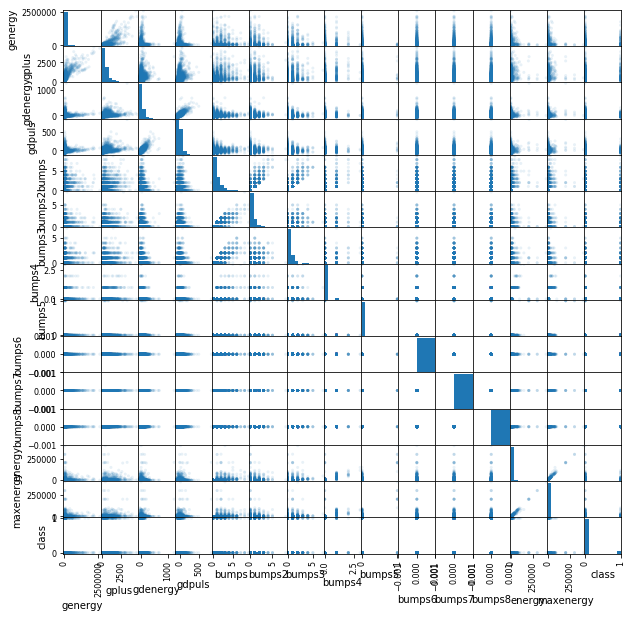

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .1, figsize = (10, 10))
pass

In [15]:
data.corr()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gplus,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
bumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
bumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381
bumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,NaN,NaN,NaN,0.244083,0.176480,0.205327
bumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,NaN,NaN,NaN,0.489828,0.416483,0.075458
bumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,NaN,NaN,NaN,0.773605,0.808406,0.004834
bumps6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Строим различные графики зависмости bumps и genergy

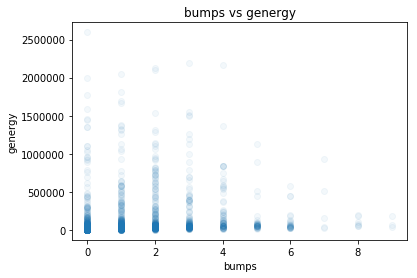

In [16]:
plt.plot(data['bumps'], data['genergy'], 'o', alpha = 0.05)
plt.xlabel('bumps')
plt.ylabel('genergy')
plt.title('bumps vs genergy')
pass

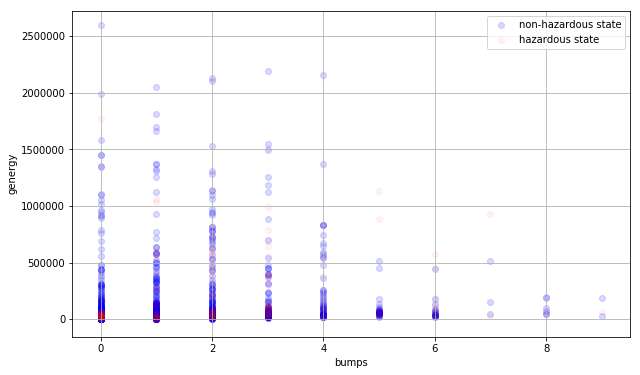

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['bumps'],
            data[data['class'] == 0]['genergy'],
            alpha = 0.15,
            label = 'non-hazardous state',
            color = 'b')

plt.scatter(data[data['class'] == 1]['bumps'],
            data[data['class'] == 1]['genergy'],
            alpha = 0.05,
            label = 'hazardous state',
            color = 'r')

plt.xlabel('bumps')
plt.ylabel('genergy')
plt.legend()
plt.grid()

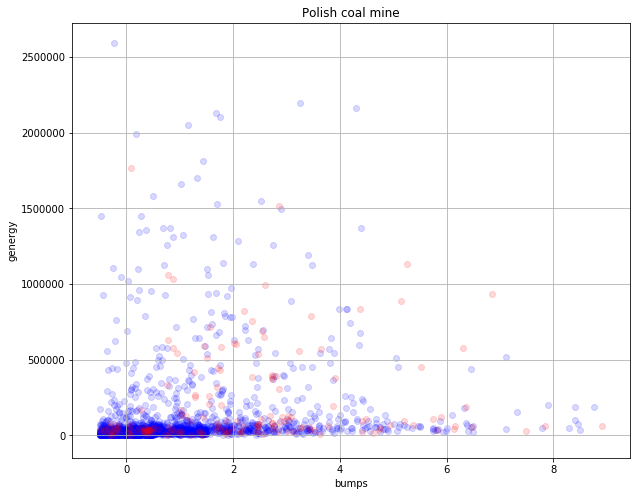

In [18]:
np.random.seed(0)
bumps_rnd = data['bumps'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(bumps_rnd[data['class'] == 0],
            data[data['class'] == 0]['genergy'],
            alpha = 0.15,
            label = 'non-hazardous state',
            color = 'b')

plt.scatter(bumps_rnd[data['class'] == 1],
            data[data['class'] == 1]['genergy'],
            alpha = 0.15,
            label = 'hazardous state',
            color = 'r')

plt.xlabel('bumps')
plt.ylabel('genergy')
plt.title('Polish coal mine')
plt.grid()

#### Выводим описательную статистику по всем атрибутам

In [19]:
data.describe(include = 'all')

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2584,2584,2584,2.584000e+03,2584.000000,2584.000000,2584.000000,2584,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
unique,2,3,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,a,a,W,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1682,1580,1663,NaN,NaN,NaN,NaN,2342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.024252e+04,538.579334,12.375774,4.508901,NaN,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,NaN,NaN,NaN,2.292005e+05,562.652536,80.319051,63.166556,NaN,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,NaN,NaN,NaN,1.000000e+02,2.000000,-96.000000,-96.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.166000e+04,190.000000,-37.000000,-36.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2.548500e+04,379.000000,-6.000000,-6.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,5.283250e+04,669.000000,38.000000,30.250000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000


#### Выводим все возможные значения, которые принимают атрибуты shift, seismoacoustic, seismic

In [20]:
data['shift'].unique()

array(['N', 'W'], dtype=object)

In [21]:
data['seismoacoustic'].unique()

array(['a', 'b', 'c'], dtype=object)

In [22]:
data['%seismic'].unique()

array(['a', 'b'], dtype=object)

# Готовим данные

#### Замечаем, что
`bumps6`, `bumps7`и `bumps8`= 0 для всех объектов датасета, т.е. должны быть удалены из датасета, так как никак не повлияют на результат классификации

In [23]:
print(data[data['bumps6'] != 0]['bumps6'])

Series([], Name: bumps6, dtype: int64)


In [24]:
print(data[data['bumps7'] != 0]['bumps7'])

Series([], Name: bumps7, dtype: int64)


In [25]:
print(data[data['bumps8'] != 0]['bumps8'])

Series([], Name: bumps8, dtype: int64)


In [26]:
data = data.drop('bumps6',   axis = 1)\
           .drop('bumps7',   axis = 1)\
           .drop('bumps8',      axis = 1) 

#### Выделяем из данных категориальные и количественные признаки

In [27]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['%seismic', 'seismoacoustic', 'shift', 'hazard']
['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5', 'energy', 'maxenergy', 'class']


In [28]:
for c in categorical_columns:
    print(c, data[c].unique())

%seismic ['a' 'b']
seismoacoustic ['a' 'b' 'c']
shift ['N' 'W']
hazard ['a' 'b' 'c']


#### Проводим векторизацию для категориальных признаков (заменяем их на эквивалентные количественные). Отдельно обрабатываем бинарные и небинарные признаки.

In [29]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['%seismic', 'shift'] ['seismoacoustic', 'hazard']


In [30]:
data.at[data['shift'] == 'N', 'shift'] = 0
data.at[data['shift'] == 'W', 'shift'] = 1
data['shift'].describe()

count    2584.000000
mean        0.643576
std         0.479035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shift, dtype: float64

In [31]:
data.at[data['%seismic'] == 'a', '%seismic'] = 0
data.at[data['%seismic'] == 'b', '%seismic'] = 1
data['%seismic'].describe()

count    2584.000000
mean        0.349071
std         0.476769
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: %seismic, dtype: float64

In [32]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a',
       'hazard_b', 'hazard_c'],
      dtype='object')


#### Нормализуем количественные признаки (при этом оставляем целевой столбец class нетронутым)

In [33]:
data_numerical = data[numerical_columns]
data_numerical = data_numerical.drop(('class'), axis = 1)
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [34]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [35]:
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01


## Соединяем все в одну таблицу

In [36]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data['class']), axis = 1)
print(data.shape)

(2584, 20)


In [37]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,hazard_a,hazard_b,hazard_c,%seismic,shift,class
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16,0.611455,0.369969,0.018576,0.906347,0.082043,0.011610,0.349071,0.643576,0.065789
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487514,0.482889,0.135048,0.291402,0.274484,0.107143,0.476769,0.479035,0.247962
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Выделяем X и Y, отбрасывая столбец class

In [38]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns

In [39]:
type(feature_names)

pandas.core.indexes.base.Index

In [40]:
feature_names

Index(['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3',
       'bumps4', 'bumps5', 'energy', 'maxenergy', 'seismoacoustic_a',
       'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a', 'hazard_b',
       'hazard_c', '%seismic', 'shift'],
      dtype='object')

In [41]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2584, 19)
(2584,)


In [42]:
type(X)

pandas.core.frame.DataFrame

In [43]:
type(y)

pandas.core.series.Series

#### Разделение на тестовую и обучающую выборки¶

30% тестовая выборка, 70% обучающая

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1808 776


# $k$NN

Тренируем классификатор методом k ближайших соседей, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.06360619469026549 0.06572164948453608


In [47]:
err_test = 1 - knn.score(X_test, y_test)

In [48]:
err_test

0.06572164948453607

In [49]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[723   0]
 [ 51   2]]


In [50]:
pd.crosstab(y_test, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,723,0,723
1,51,2,53
All,774,2,776


### Подбор параметра k ближайших соседей

Тренируем классификатор с выбранным параметром

In [51]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.06471238938053092 10


In [52]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.06360619469026549 0.06572164948453608


In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[723   0]
 [ 51   2]]


Метод kNN покаал самую низкую ошибку на тестовой и обучающей выборках

# SVC

Тренируем классификатор с помощью машины опорных векторов, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_test_predict = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.06415929203539823 0.06829896907216494


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[723   0]
 [ 53   0]]


### Подбор параметров

In [57]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.06471238938053092 1e-05


In [58]:
svc = SVC(C = best_C).fit(X_train, y_train)
y_test_predict = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.06471238938053098 0.06829896907216494


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[723   0]
 [ 53   0]]


# Random Forest

Тренируем классификатор с помощью алогоритма случайный лес, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [60]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.07087628865979381


In [61]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[721   2]
 [ 53   0]]


### Значимость признаков

In [62]:
np.sum(rf.feature_importances_)

0.9999999999999994

In [63]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Features ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Features ranking:
 1. feature 'gplus' (0.177250)
 2. feature 'genergy' (0.168571)
 3. feature 'gdpuls' (0.147790)
 4. feature 'gdenergy' (0.145289)
 5. feature 'energy' (0.084692)
 6. feature 'maxenergy' (0.063370)
 7. feature 'bumps' (0.050753)
 8. feature 'bumps2' (0.037271)
 9. feature 'bumps3' (0.027959)
10. feature '%seismic' (0.022732)
11. feature 'seismoacoustic_b' (0.015584)
12. feature 'seismoacoustic_a' (0.015105)
13. feature 'bumps4' (0.010110)
14. feature 'shift' (0.009547)
15. feature 'hazard_b' (0.007895)
16. feature 'hazard_a' (0.007854)
17. feature 'seismoacoustic_c' (0.006534)
18. feature 'bumps5' (0.001216)
19. feature 'hazard_c' (0.000477)


In [64]:
feature_names[[1,0,1]]

Index(['gplus', 'genergy', 'gplus'], dtype='object')

(-1, 19)

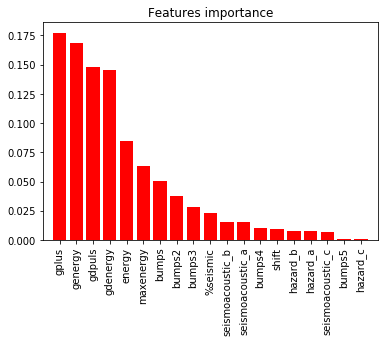

In [65]:
d_first = 19
plt.title("Features importance")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Значимость признаков сильно различается, поэтому возможно, что удаление наименее значимых признаков сильно повлияет в лучшую сторону на эффективность классификатора

# Extremely Randomized Trees

Тренируем классификатор с помощью метода сверхслучайных деревьев, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [66]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)
y_test_predict = ert.predict(X_test)
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.07860824742268041


In [67]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[712  11]
 [ 50   3]]


# AdaBoost

Тренируем классификатор с помощью алгоритма Adaptive Boosting, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [68]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)
y_test_predict = ada.predict(X_test)
err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.02157079646017699 0.09020618556701031


In [69]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[701  22]
 [ 48   5]]


# GBT

Тренируем классификатор с помощью алгоритма Gradient Boosting, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [70]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)
y_test_predict = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.0 0.07603092783505154


In [71]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[712  11]
 [ 48   5]]


Метод GBT показал наименьшую ошибку 2-го рода при относительно низкой ошибке на тестовой выборке

# Вывод

Наименьшую ошибку (0.06572164948453607) на тестовой выборке показал метод K ближайших соседей.
При этом все методы показали высокую ошибку 2-го рода. Наименьшую ошибку 2-го рода при относительно низкой ошибке на тестовой выборке (0.07731958762886598) показал метод GBT.
Следует отметить, что на такую большую ошибку 2-го рода во многом влияет наличие некоторых мало значимых признаков, а также малое количество положительных записей (class = 1) в данных (170 из 2584).

# Лабораторная работа №2

# Нейронная сеть

In [108]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [109]:
mlp_model.n_layers_

3

Ошибки на обучающей и тестовой выборках:

In [110]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.03926991150442478 0.09922680412371133


### Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha

In [111]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

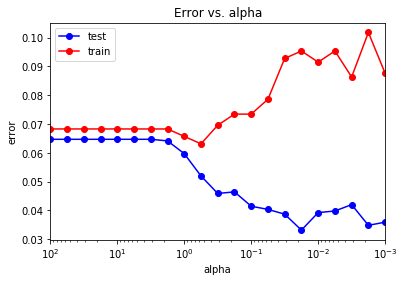

In [112]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [113]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.033185840707964605 0.06314432989690721


Оптимальное значение alpha:

In [114]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.5623413251903491


Подберем оптимальное количество нейронов

In [115]:
neurons_arr = [5,10,15,25,50,100]
test_err = []
train_err = []
for neuron_size in neurons_arr:
    hidden_layer_sizes = (neuron_size,)
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

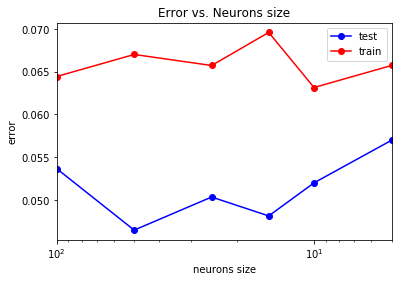

In [116]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. Neurons size')
plt.xlabel('neurons size')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [117]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.046460176991150445 0.06314432989690721


Оптимальное количество нейронов

In [118]:
index = test_err.index(min_test_err)
neuron_size_opt = neurons_arr[index]
print(neuron_size_opt)

10


### Классификатор при найденных оптимальных значениях гиперпараметров:

3 скрытых слоя:

In [140]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,neuron_size_opt,neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.043694690265486724
0.06443298969072164


In [141]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,714,9,723
1,41,12,53
All,755,21,776


2 скрытых слоя:

In [142]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.04480088495575221
0.07345360824742268


In [144]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,710,13,723
1,44,9,53
All,754,22,776


1 скрытый слой:

In [145]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.051991150442477874
0.06314432989690721


Матрица рассогласования:

In [146]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,719,4,723
1,45,8,53
All,764,12,776


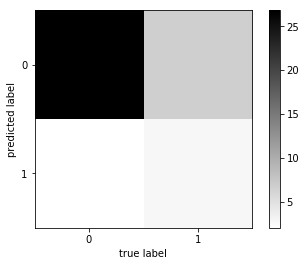

In [121]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### Другие метрики качества:

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       723
           1       0.67      0.15      0.25        53

   micro avg       0.94      0.94      0.94       776
   macro avg       0.80      0.57      0.61       776
weighted avg       0.92      0.94      0.92       776



# Вывод